In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import importlib
import utils
import glob
from collections import defaultdict

import seaborn as sns
import pandas as pd

def in_notebook():
    try:
        from IPython import get_ipython
        if 'IPKernelApp' not in get_ipython().config:  # pragma: no cover
            return False
    except ImportError:
        return False
    except AttributeError:
        return False
    return True

def show_plt_if_in_notebook(title=None):
    if in_notebook():
        plt.show()
    else:
        plt.savefig(title)

# Metrics

/scratch/gpfs/qanguyen/mind_reader/Lafite_rep_1680510923.601494.pth.tar
/scratch/gpfs/qanguyen/mind_reader/Lafite_rep_1680510923.601494.pth.tar plotting 81
dict_keys(['loss_GAN_Generator', 'Lc1', 'Lc2', 'pl_penalty', 'loss_Dreal', 'Lc1_txt_txt', 'Lc1_img_img', 'r1_penalty'])


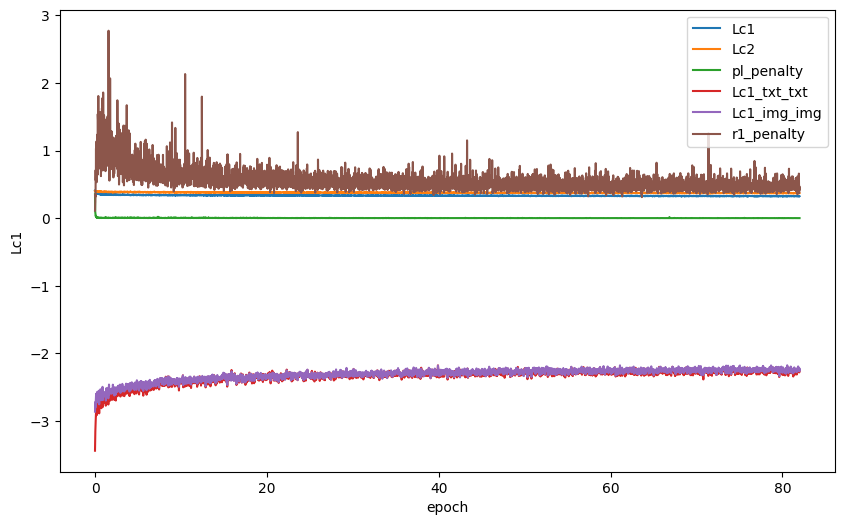

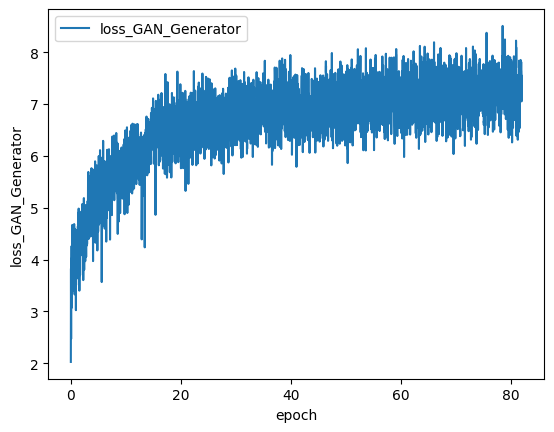

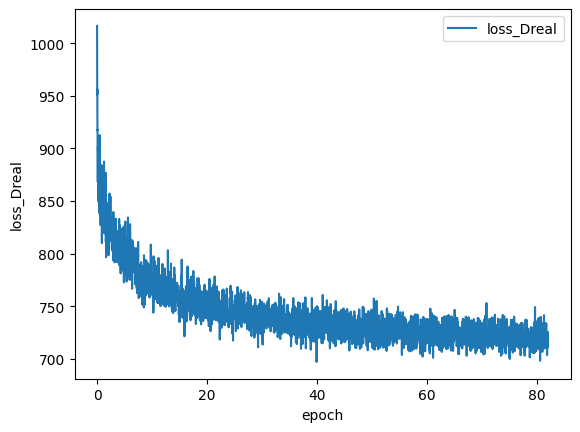

In [2]:

def get_record(order, is_online, extra = "", title = None,  
               zero_out_list = None,
               image_transform_loader_list = None,
               tiling_orientation_ablation_list = None,
               tiling_list = None,
               outdir = "/scratch/gpfs/qanguyen/poly1/",
              palette = sns.color_palette("Set3", 10),
               hue_variable = "data_rescale"
):
     
    warnings.filterwarnings(action='once')
    
    
    record_names = glob.glob(f"{outdir}/Lafite_rep*pth.tar")
    
    #record_included = [int(r.split("_")[-1].split(".")[0]) for r in record_names]
    #record_included = [((r > 1675853450) and (r < 1675912720)) for r in record_included]
    #record_names = [ r for i,r in enumerate(record_names) if record_included[i] == True]
    #print(record_names, len(record_names))
    fig, ax = plt.subplots(figsize=(10, 6))
    for f in record_names :
        print(f)
        try:
            
            record = torch.load(f, map_location = torch.device('cpu')) 
        except Exception as e: 
            print(e)
         
#         try:
#             if record.curr_epoch < 12:
#                 continue
#             #if (zero_out_list is not None) and (record.args.zero_out not in zero_out_list):
#             #    continue

#         except Exception as e: 
#             print(e)
#             continue
        print(f, "plotting", record.curr_epoch )
        print( record.metrics.keys() )
        for metric in record.metrics:
            if metric in ["loss_GAN_Generator", "loss_Dreal"]: continue
            pars = defaultdict(list)
            i = 0 
            # record.metrics[metric]: dict of epoch: list 
            for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
                pars[metric].extend([i.item() for i in metric_list])
                pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])
                 

    
            pars = pd.DataFrame.from_dict(pars) 
            pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
            # display(pars)
            sns.lineplot(x = "epoch", y= metric, 
                          label=metric,
                         palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    for metric in record.metrics:
        if metric not in ["loss_GAN_Generator" ]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
    for metric in record.metrics:
        if metric not in [  "loss_Dreal"]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
import warnings

 
workdir = "/scratch/gpfs/qanguyen"
 
get_record( order = "*",  
           is_online=False, title = f"Imagenet loss, loss vs. data_rescale",
           palette = sns.color_palette("deep", 15),
           outdir = f"{workdir}/mind_reader",
           zero_out_list = None,
           image_transform_loader_list = ['TileImagenet'],
           hue_variable =  None,
           tiling_orientation_ablation_list = [True, False],
           tiling_list = ["1,1", "1,2", "1,3", "2,1", "2,2", "2,3", "3,1", "3,2", "3,3"]
          ) 

# Visualize model output

In [ ]:

def get_record(order, is_online, extra = "", title = None,  
               zero_out_list = None,
               image_transform_loader_list = None,
               tiling_orientation_ablation_list = None,
               tiling_list = None,
               outdir = "/scratch/gpfs/qanguyen/poly1/",
              palette = sns.color_palette("Set3", 10),
               hue_variable = "data_rescale"
):
     
    warnings.filterwarnings(action='once')
    
    
    record_names = glob.glob(f"{outdir}/Lafite_rep*pth.tar")
    
    #record_included = [int(r.split("_")[-1].split(".")[0]) for r in record_names]
    #record_included = [((r > 1675853450) and (r < 1675912720)) for r in record_included]
    #record_names = [ r for i,r in enumerate(record_names) if record_included[i] == True]
    #print(record_names, len(record_names))
    fig, ax = plt.subplots(figsize=(10, 6))
    for f in record_names :
        print(f)
        try:
            
            record = torch.load(f, map_location = torch.device('cpu')) 
        except Exception as e: 
            print(e)
         
#         try:
#             if record.curr_epoch < 12:
#                 continue
#             #if (zero_out_list is not None) and (record.args.zero_out not in zero_out_list):
#             #    continue

#         except Exception as e: 
#             print(e)
#             continue
        print(f, "plotting", record.curr_epoch )
        print( record.metrics.keys() )
        for metric in record.metrics:
            if metric in ["loss_GAN_Generator", "loss_Dreal"]: continue
            pars = defaultdict(list)
            i = 0 
            # record.metrics[metric]: dict of epoch: list 
            for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
                pars[metric].extend([i.item() for i in metric_list])
                pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])
                 

    
            pars = pd.DataFrame.from_dict(pars) 
            pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
            # display(pars)
            sns.lineplot(x = "epoch", y= metric, 
                          label=metric,
                         palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    for metric in record.metrics:
        if metric not in ["loss_GAN_Generator" ]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
    for metric in record.metrics:
        if metric not in [  "loss_Dreal"]: continue
        pars = defaultdict(list)
        i = 0 
        # record.metrics[metric]: dict of epoch: list 
        for epoch, metric_list in sorted(record.metrics[metric].items(), key=lambda x: x[0]):
            pars[metric].extend([i.item() for i in metric_list])
            pars["epoch"].extend([epoch + i/len(metric_list) for i in range(len(metric_list))])



        pars = pd.DataFrame.from_dict(pars) 
        pars = pars.sort_values(by=hue_variable, ascending=True) if hue_variable is not None else pars
        # display(pars)
        sns.lineplot(x = "epoch", y= metric, 
                      label=metric,
                     palette = palette, data=pars  )
  
 
    show_plt_if_in_notebook()
    
import warnings

 
workdir = "/scratch/gpfs/qanguyen"
 
get_record( order = "*",  
           is_online=False, title = f"Imagenet loss, loss vs. data_rescale",
           palette = sns.color_palette("deep", 15),
           outdir = f"{workdir}/mind_reader",
           zero_out_list = None,
           image_transform_loader_list = ['TileImagenet'],
           hue_variable =  None,
           tiling_orientation_ablation_list = [True, False],
           tiling_list = ["1,1", "1,2", "1,3", "2,1", "2,2", "2,3", "3,1", "3,2", "3,3"]
          ) 

In [28]:
import webdataset as wds
import torch
import random

train_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/train/train_subj01_{0..17}.tar"
# “{/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/train/train_subj01_{0..17}.tar,/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/val/val_subj01_0.tar}”
val_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/val/val_subj01_0.tar"
# “/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/test/test_subj01_{0..1}.tar”
meta_url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_avg_split/metadata_subj01.json"
# “/fsx/proj-medarc/fmri/natural-scenes-dataset/webdataset_avg_split/metadata_subj01.json”
num_train = 8559 + 300
num_val = 982
batch_size = 16
num_workers = 1
voxels_key="nsdgeneral.npy",
to_tuple=["voxels", "images", "trial", "idx"]
# for loading dataloader
val_data = wds.WebDataset(val_url, resampled=False) \
    .decode("torch") \
#     .rename(images="jpg;png", voxels="nsdgeneral.npy", trial="trial.npy", coco= "coco73k.npy", reps="num_uniques.npy", \
#                idx = "__key__"
#                )\
#     .to_tuple(*to_tuple) \
#     .batched(batch_size, partial=True)
val_dl = torch.utils.data.DataLoader(val_data, batch_size=None, num_workers=num_workers, shuffle=False)

In [30]:
for i, b in enumerate(val_dl):
    #print (i,    )
    print(b.keys() )
    if i > 2:
        break

dict_keys(['__key__', '__url__', 'coco73k.npy', 'jpg', 'nsdgeneral.npy', 'num_uniques.npy', 'trial.npy', 'wholebrain_3d.npy'])
dict_keys(['__key__', '__url__', 'coco73k.npy', 'jpg', 'nsdgeneral.npy', 'num_uniques.npy', 'trial.npy', 'wholebrain_3d.npy'])
dict_keys(['__key__', '__url__', 'coco73k.npy', 'jpg', 'nsdgeneral.npy', 'num_uniques.npy', 'trial.npy', 'wholebrain_3d.npy'])
dict_keys(['__key__', '__url__', 'coco73k.npy', 'jpg', 'nsdgeneral.npy', 'num_uniques.npy', 'trial.npy', 'wholebrain_3d.npy'])
